In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
eps_0 = 8.85*(10**(-12))
eps_r = 10
q_arg210 = 1
q_asp61 = -1
lam_1 = 1.1*(10**(-9)) #1/lambda
k_0 = 1/(4*np.pi*eps_0)
t = (2*np.pi)/12

R = 5*(10**(-9)) #Radio del rotor
z = 0.52*(10**(-9)) #posición Arg210 fuera del plano del rotor
R_2 = R + z

In [3]:
def U_Coulomb(q_arg210,q_asp61,r):
    u = k_0*(1/eps_r)*((q_arg210*q_asp61)/r)*np.exp(-r/lam_1)
    return u

In [4]:
t1 = np.linspace(0, t, 100)
t2 = np.linspace(t, 2*t, 100)
r1_R = np.sqrt(R_2**2 + R**2 - 2*R*R_2*np.cos(t1))
r2_L = np.sqrt(R_2**2 + R**2 - 2*R*R_2*np.cos(t2))

In [5]:
u_R_des = U_Coulomb(q_arg210,q_asp61,r1_R)
u_R_prot = U_Coulomb(q_arg210,0,r1_R)

u_L_des = U_Coulomb(q_arg210,q_asp61,r2_L)
u_L_prot = U_Coulomb(q_arg210,0,r2_L)

In [6]:
U_Empty_R = u_R_des
U_Empty_L = u_L_des

U_Right_R = u_R_prot
U_Right_L = u_L_des

U_Left_R = u_R_des
U_Left_L = u_L_prot

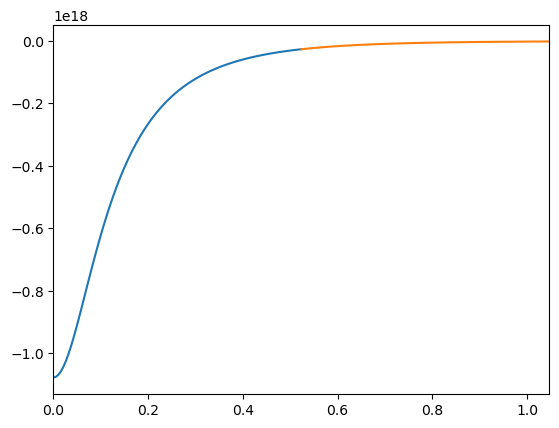

In [7]:
plt.plot(t1,U_Empty_R)
plt.plot(t2,U_Empty_L)
plt.xlim(0,2*t)
plt.show()

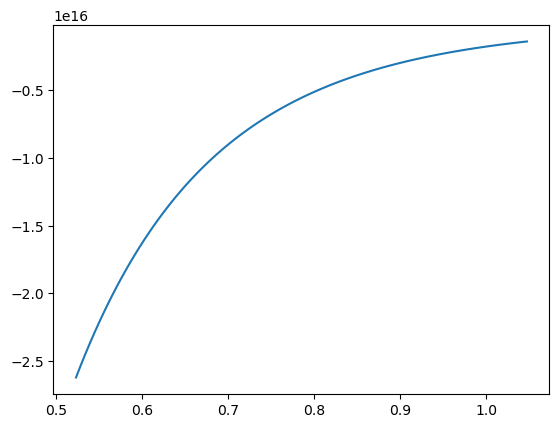

In [8]:
plt.plot(t2,U_Empty_L)

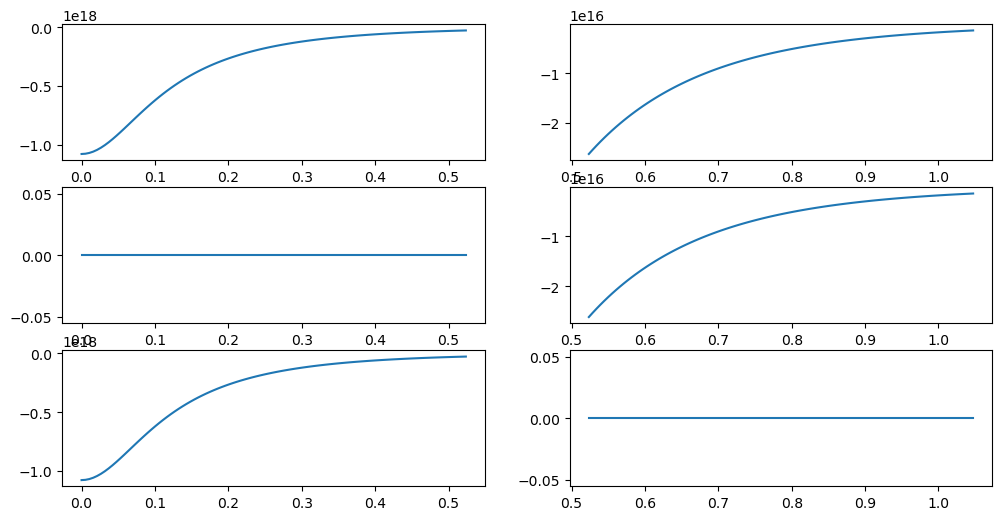

In [9]:
fig, ax = plt.subplots(3, 2, figsize=(12,6))
ax[0,0].plot(t1,U_Empty_R)
ax[0,1].plot(t2,U_Empty_L)
ax[1,0].plot(t1,U_Right_R)
ax[1,1].plot(t2,U_Right_L)
ax[2,0].plot(t1,U_Left_R)
ax[2,1].plot(t2,U_Left_L)


In [10]:
theta = np.linspace(0,2*t,100*2)
def Empty(theta):
    z= np.piecewise(theta, 
                        [theta < t, theta >= t], 
                        [lambda T: u_R_des, lambda T: u_L_des])
    return z

def Right(theta):
    z= np.piecewise(theta, 
                        [theta < t, theta >= t], 
                        [lambda T: u_R_prot, lambda T: u_L_des])
    return z

def Left(theta):
    z= np.piecewise(theta, 
                        [theta < t, theta >= t], 
                        [lambda T: u_R_des, lambda T: u_L_prot])
    return z

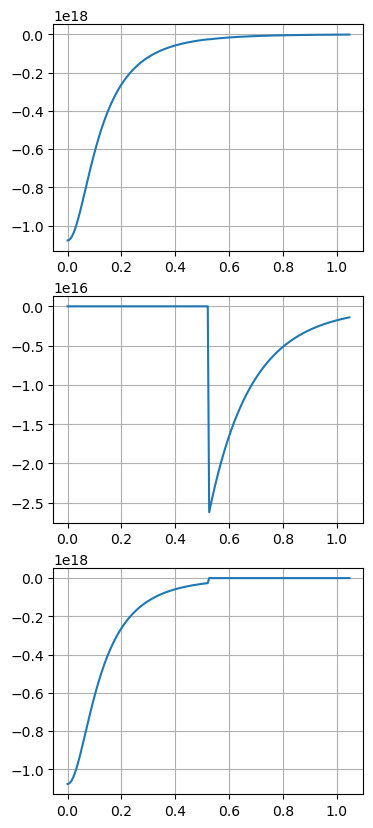

In [23]:
fig, ax = plt.subplots(3, 1, figsize=(4,10))
ax[0].plot(theta, Empty(theta))
ax[0].grid()
ax[1].plot(theta, Right(theta))
ax[1].grid()
ax[2].plot(theta, Left(theta))
ax[2].grid()
#plt.plot(theta, Left(theta))
#plt.plot(theta, Right(theta))
#plt.plot(theta, Left(theta))
#plt.axvline(t, color = "grey", linestyle = "-")
#plt.grid()
#plt.show()